In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 2: Load the Data
df = pd.read_csv('coffee_sales_rawdata.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,12:15:50 AM,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,12:19:22 AM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,12:20:18 AM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,12:46:33 AM,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,12:48:15 AM,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
# Step 3: Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Step 4: Feature Engineering from 'date'
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

In [9]:
# Step 5: Drop unnecessary columns
df_model = df.drop(columns=['datetime', 'card', 'date'])

In [10]:
# Step 6: One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['cash_type', 'coffee_name'], drop_first=True)
df_encoded.head()

,money,day,month,weekday,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,38.7,1,3,4,False,False,False,False,False,False,False,True
1,38.7,1,3,4,False,False,False,False,False,False,True,False
2,38.7,1,3,4,False,False,False,False,False,False,True,False
3,28.9,1,3,4,False,False,False,False,False,False,False,False
4,38.7,1,3,4,False,False,False,False,False,False,False,True


In [11]:
# Step 7: Define Features and Target
X = df_encoded.drop('money', axis=1)
y = df_encoded['money']

In [12]:
# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 9: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Step 10: Predict and Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.99
Root Mean Squared Error (RMSE): 1.19
R² Score: 0.92


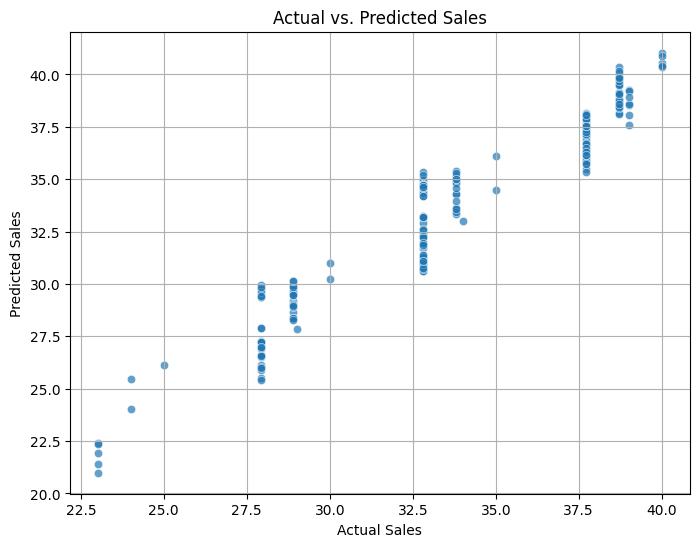

In [15]:
# Step 11: Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

# CONCLUSION

### Based on the analysis of the coffee sales dataset, we developed a linear regression model to predict the transaction amount (in ₹) using features such as coffee type, payment method, and time-based attributes extracted from the transaction date. After cleaning the data and performing one-hot encoding on categorical variables, we split the data into training and testing sets and trained a linear model. The model performed exceptionally well, achieving an R² score of 0.92, indicating that it explains 92% of the variance in the target variable. The low error metrics—Mean Absolute Error (₹0.99) and Root Mean Squared Error (₹1.19)—confirm that the model's predictions are highly accurate and consistent with actual sales values.

### This outcome suggests that the selected features—particularly the type of coffee purchased and temporal aspects like day and weekday—are strong predictors of transaction value. The model is not only statistically sound but also practical for business applications such as forecasting revenue, identifying peak sales periods, and guiding inventory or pricing strategies. Overall, this project demonstrates the effectiveness of basic machine learning techniques in deriving actionable insights from transactional data.